 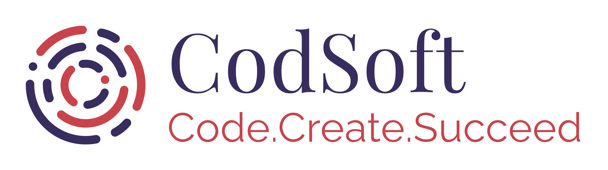

# **CodSoft - Data Science Internship**



## **`Author: Sai Charan Kanthuri Venkata`**
## **`Batch : SEPT BATCH A5`**
## **`Role: Data Science Intern`**
---



# **`Task 4 : Sales Prediction Using Python`**



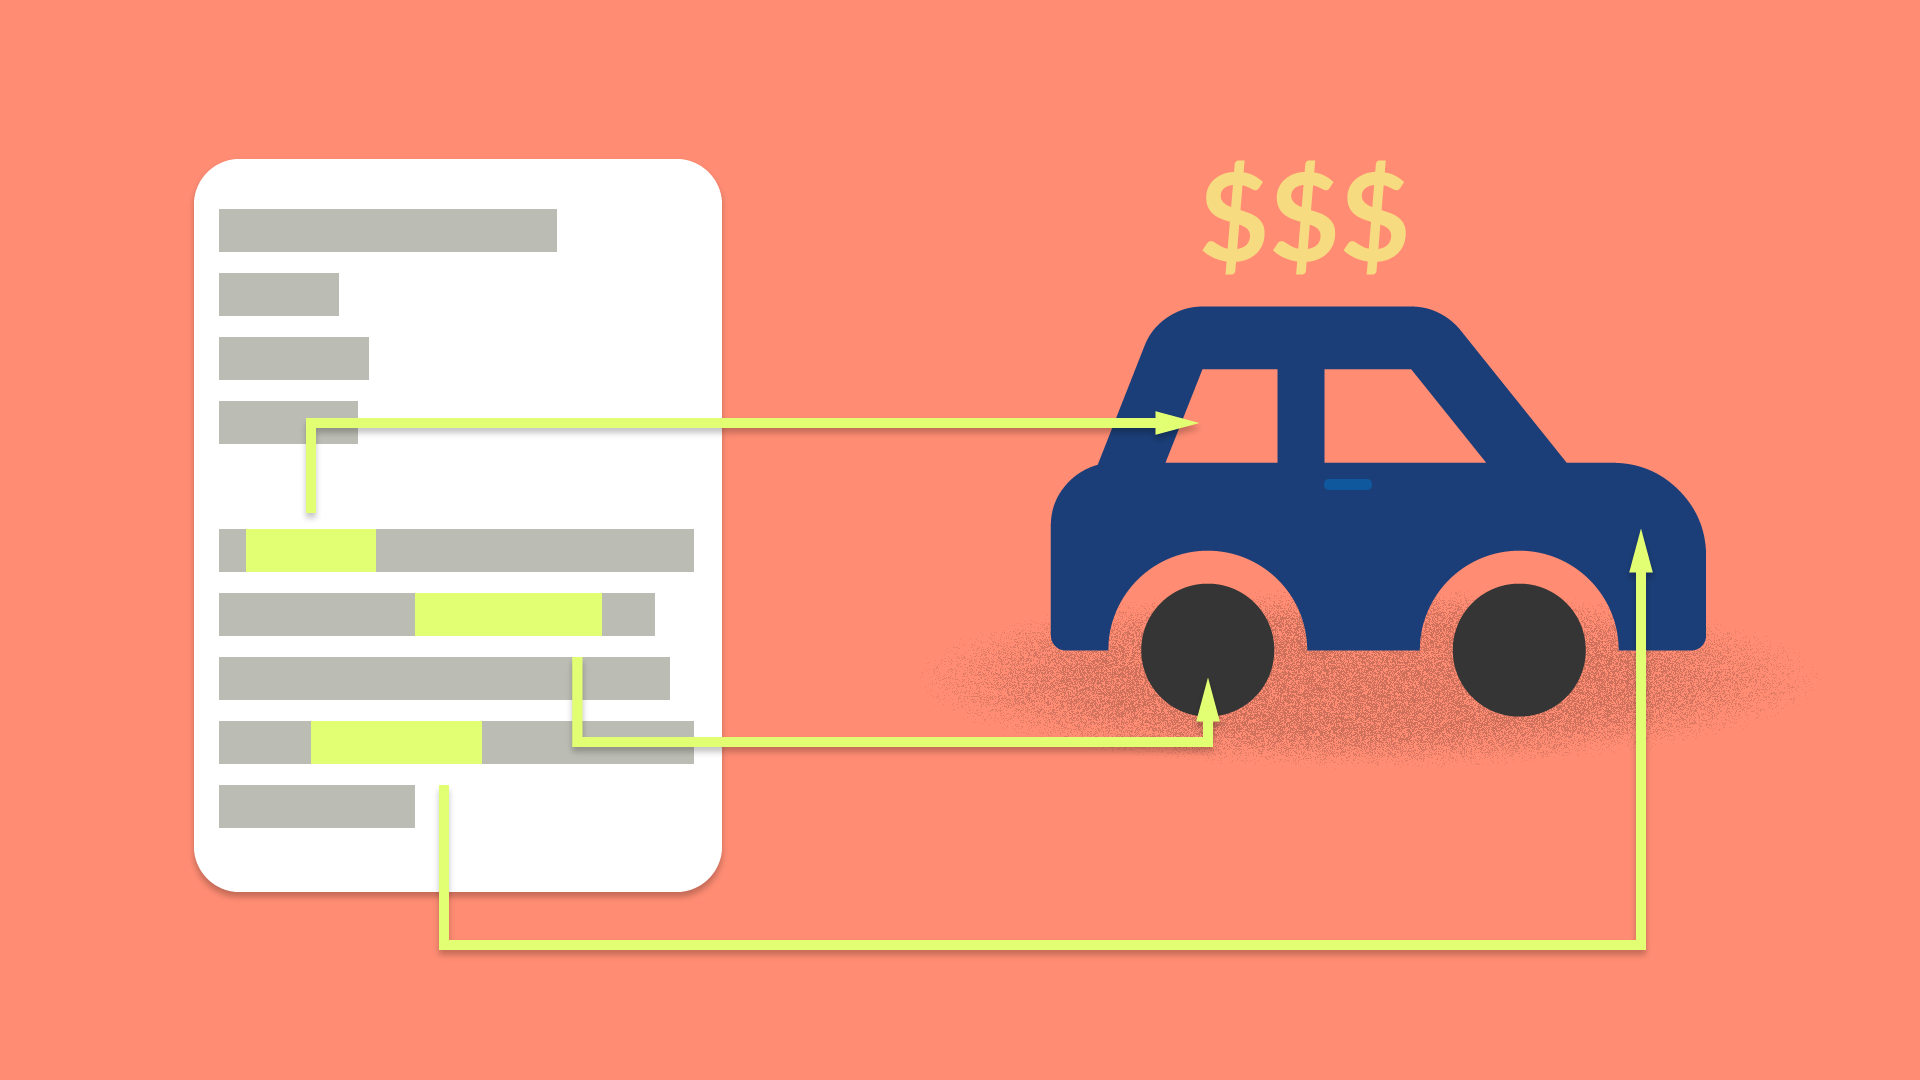

# `1. Importing Necessary Modules and Requirements`

In [1]:
# For Data Manipulation
import numpy as np
import pandas as pd

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For Model Training
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split

#To Remove Unimportant Warnings
import warnings
warnings.filterwarnings("ignore")

print("All Necessary Module Successfully loaded")


All Necessary Module Successfully loaded


In [2]:
#Data Importing
data= pd.read_csv('/content/car_purchasing.csv', encoding='latin')

data.head(8)

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
5,Carla Hester,mi@Aliquamerat.edu,Liberia,1,56.824893,68499.85162,14179.472440,428485.3604,56611.99784
6,Griffin Rivera,vehicula@at.co.uk,Syria,1,46.607315,39814.52200,5958.460188,326373.1812,28925.70549
7,Orli Casey,nunc.est.mollis@Suspendissetristiqueneque.co.uk,Czech Republic,1,50.193016,51752.23445,10985.696560,629312.4041,47434.98265


In [3]:
data.tail()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353
499,Marla,Camaron.marla@hotmail.com,marlal,1,46.731152,61370.67766,9391.341628,462946.4924,45107.22566


In [4]:
data.columns

Index(['customer name', 'customer e-mail', 'country', 'gender', 'age',
       'annual Salary', 'credit card debt', 'net worth',
       'car purchase amount'],
      dtype='object')

In [5]:
data.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


# `2. Data Cleaning`

In [6]:
print(data.isnull().sum())

customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [8]:
data.drop (['customer name','customer e-mail', 'country','gender'],axis=1 ,inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  500 non-null    float64
 1   annual Salary        500 non-null    float64
 2   credit card debt     500 non-null    float64
 3   net worth            500 non-null    float64
 4   car purchase amount  500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


##### **As categorical columns are not worth while preparing model. so dropping them and then EDA can also be easily performed on numerical data as categorical columns are more unique and vast**

# `3. Exploaratory Data Analysis`

<Axes: xlabel='car purchase amount', ylabel='annual Salary'>

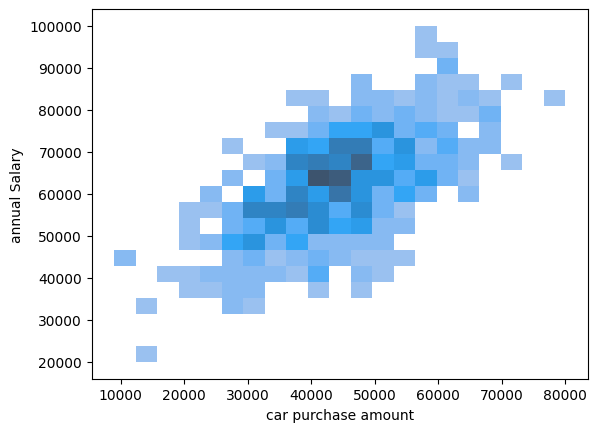

In [10]:
sns.histplot(y=data['annual Salary'],x=data['car purchase amount'])

<Axes: xlabel='car purchase amount', ylabel='age'>

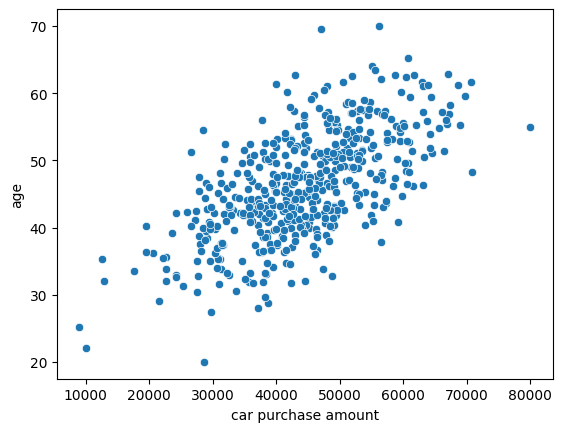

In [11]:
sns.scatterplot(y='age',x='car purchase amount', data=data)

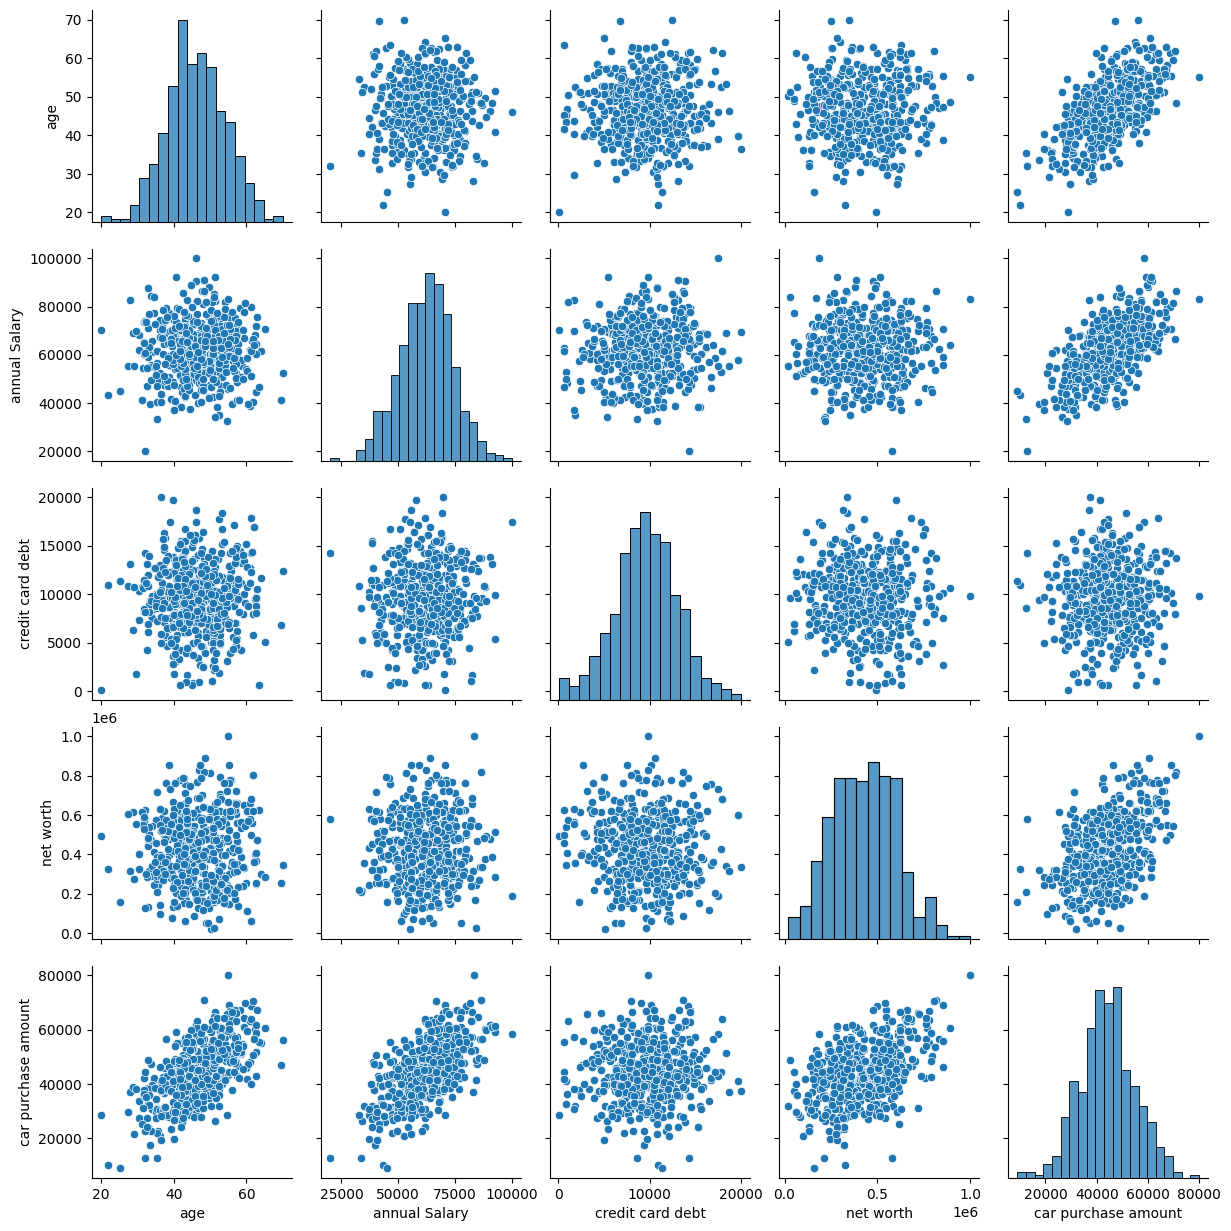

In [12]:
sns.pairplot(data=data)

##### **1 .Majority of `middle aged people(40-60)` can afford to buy cars in range of $40000 - 50000$.**
##### **2 .Customers trying to avoid the purchase if their credit card debt is high**
##### **3. Mid Range cars are sold higher than other cars. we can assume most customers salary range is medium and cannot afford expensive and doesnot want too low cars.**

# `4. Model Training`

In [13]:
X=data.drop('car purchase amount',axis=1)
y=data['car purchase amount']

### `4.1 Data Scaling`

###### ***Short Info About MinMaxScaler***
**I. MinMaxScaler scales all the data features in the range [0, 1] or else in the range [-1, 1] if there are negative values in the dataset.**     
**II. MinMaxScaler doesn’t reduce the effect of outliers, but it linearily scales them down into a fixed range, where the largest occuring data point corresponds to the maximum value and the smallest one corresponds to the minimum value.**

In [14]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y.values.reshape(-1, 1))

### `4.2 Data Splitting`

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(400, 4)
(400, 1)
(100, 4)
(100, 1)


### `4.3 Artifical Neutral Network Model Structure`

**An artificial neural network (ANN) is a machine learning model that's inspired by the human brain's neural structure. It's a biologically inspired sub-field of artificial intelligence.It can be created by adding nodes(features)to layers with a weight.**

In [16]:
model = Sequential()
model.add(Dense(10, activation='relu', input_dim=4))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                50        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 171 (684.00 Byte)
Trainable params: 171 (684.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
10/10 [==============================] - 1s 17ms/step - loss: 0.4173 - mean_absolute_error: 0.6221 - val_loss: 0.3987 - val_mean_absolute_error: 0.6068
Epoch 2/50
10/10 [==============================] - 0s 6ms/step - loss: 0.3368 - mean_absolute_error: 0.5558 - val_loss: 0.3257 - val_mean_absolute_error: 0.5445
Epoch 3/50
10/10 [==============================] - 0s 4ms/step - loss: 0.2725 - mean_absolute_error: 0.4956 - val_loss: 0.2679 - val_mean_absolute_error: 0.4892
Epoch 4/50
10/10 [==============================] - 0s 4ms/step - loss: 0.2237 - mean_absolute_error: 0.4452 - val_loss: 0.2243 - val_mean_absolute_error: 0.4427
Epoch 5/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1860 - mean_absolute_error: 0.4026 - val_loss: 0.1898 - val_mean_absolute_error: 0.4028
Epoch 6/50
10/10 [==============================] - 0s 5ms/step - loss: 0.1568 - mean_absolute_error: 0.3660 - val_loss: 0.1606 - val_mean_absolute_error: 0.3660
Epoch 7/50
10/10 [=========

# `5. Calculation of Accuracy and Loss of Model`

In [18]:
# Define needed variables
tr_acc = history.history['mean_absolute_error']
tr_loss = history.history['loss']
val_acc = history.history['val_mean_absolute_error']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

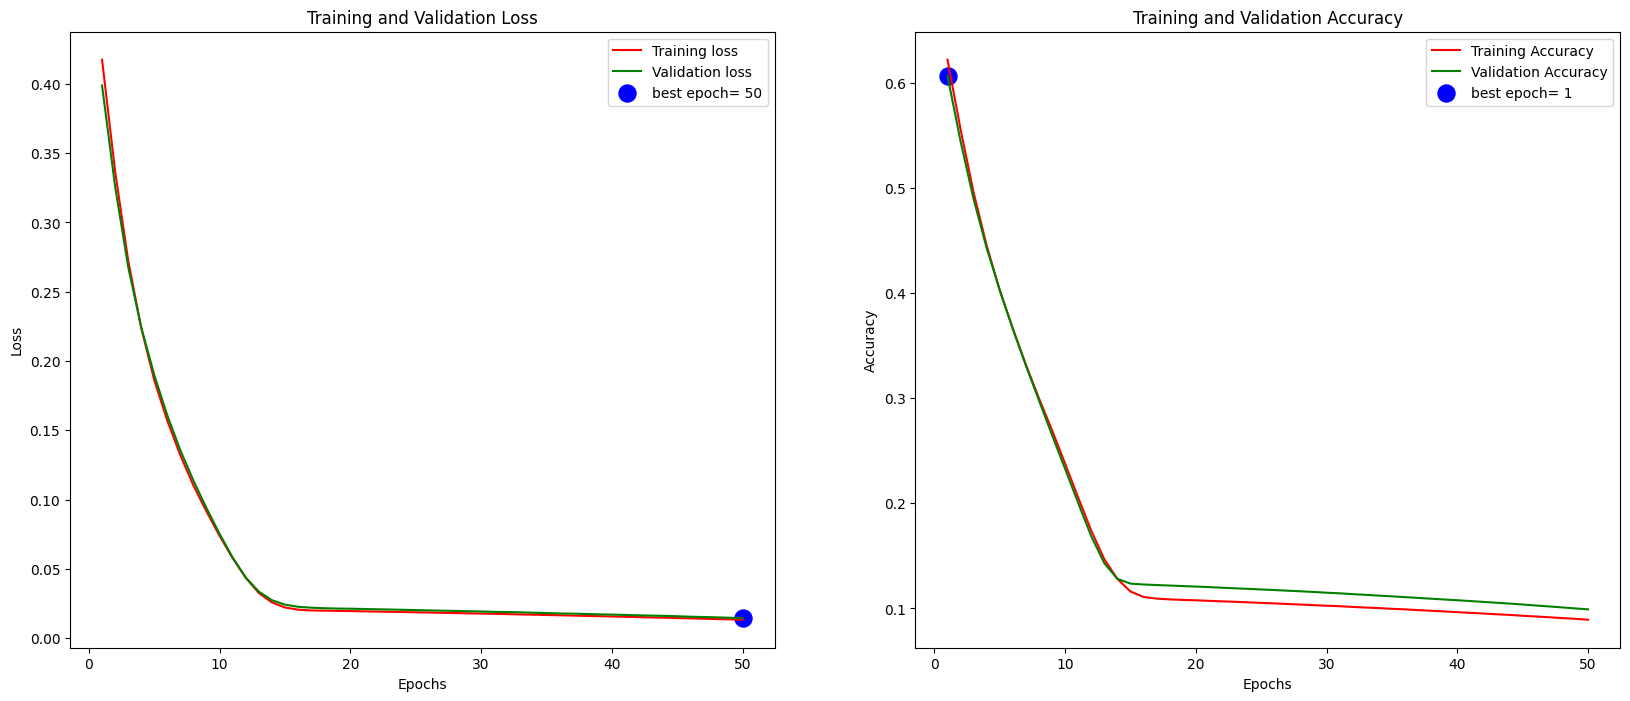

In [19]:
# Plot training history
plt.figure(figsize= (20, 8))

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

**More Epochs  results in better accuracy and low loss for a ANN model.**

# `6. Prediction`

In [20]:
y_pred = model.predict(X_test)

4/4 [==============================] - 0s 2ms/step


In [21]:
from sklearn.metrics import r2_score

R2 = r2_score(y_test, y_pred)
print("R2 Score=",round(R2*100,2),"%" )

R2 Score= 41.81 %


## **Conclusion:**
### **1. 50 Epochs made an accuracy of model to 98.36% . Changing Epoch while training model changes in results and prediction.**
### **2. This model can also be created using regression by finding trends and many more ways.**

### **References:**


*   Wikipedia
*   Seaborn,matplolib,sklearn Documentations
*    Neural Networks Blogs and mini models.


# ***THANK YOU 😀***
# ***Happy a nice day***